# Web scraping project using beautiful soup 
### Scraping the [List of largest companies in the United States by revenue](https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue) from Wikipedia.

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"

# Send a GET request to the URL
response = requests.get(url)

# Create a BeautifulSoup object with the response content
soup = BeautifulSoup(response.content, "html.parser")

# Find the first table on the page
table = soup.find('table', class_ = 'wikitable sortable')

# Extract the table headers
headers = [header.text.strip() for header in table.find_all("th")]

# Extract the table rows
rows = []
for row in table.find_all("tr")[1:]:
    rows.append([cell.text.strip() for cell in row.find_all("td")])

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(rows, columns=headers)

# Apply CSS styles to align headers centrally
styled_df = df.style.set_table_styles(
    [{"selector": "th", "props": [("text-align", "center")]}]
)

# Display the styled DataFrame
styled_df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
5,6,CVS Health,Healthcare,"322,467",10.4%,"259,500","Woonsocket, Rhode Island"
6,7,Berkshire Hathaway,Conglomerate,"302,089",9.4%,"383,000","Omaha, Nebraska"
7,8,Alphabet,Technology,"282,836",9.8%,"156,000","Mountain View, California"
8,9,McKesson Corporation,Health,"276,711",4.8%,"48,500","Irving, Texas"
9,10,Chevron Corporation,Petroleum industry,"246,252",51.6%,"43,846","San Ramon, California"


In [5]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


In [6]:
df.describe()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
count,100,100,100,100,100,100,100
unique,100,100,38,99,92,97,76
top,1,Walmart,Financials,"47,194",9.4%,"50,000","New York City, New York"
freq,1,1,11,2,2,2,12


##### Checking for null values

In [9]:
df.isna().sum().sum()

0

In [11]:
import numpy as np

# Calculate summary statistics using NumPy
revenue_values = df['Revenue (USD millions)'].str.replace(',', '').astype(float)
summary_stats = {
    'Mean': np.mean(revenue_values),
    'Median': np.median(revenue_values),
    'Minimum': np.min(revenue_values),
    'Maximum': np.max(revenue_values),
    'Standard Deviation': np.std(revenue_values)
}
print(summary_stats)

{'Mean': 117566.46, 'Median': 80824.5, 'Minimum': 44200.0, 'Maximum': 611289.0, 'Standard Deviation': 100409.26881681992}


In [14]:
# Sort the DataFrame by revenue in descending order
sorted_df = df.sort_values('Revenue (USD millions)', ascending=False)
sorted_df.head(6)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
38,39,Lowe's,Retail,"97,059",0.8%,"244,500","Mooresville, North Carolina"
39,40,Johnson & Johnson,Pharmaceutical industry,"94,943",1.2%,"152,700","New Brunswick, New Jersey"
40,41,FedEx,Transportation,"93,512",11.4%,"518,249","Memphis, Tennessee"
41,42,Humana,Health Insurance,"92,870",11.8%,"67,100","Louisville, Kentucky"
42,43,Energy Transfer Partners,Petroleum industry,"89,876",33.3%,"12,565","Dallas, Texas"
43,44,State Farm,Financials,"89,328",8.6%,"60,519","Bloomington, Illinois"


In [16]:
# Count the number of companies in each industry
company_count = df['Industry'].value_counts()
print(company_count)

Financials                          11
Retail                              10
Petroleum industry                  10
Technology                           8
Pharmaceutical industry              7
Healthcare                           6
Insurance                            5
Conglomerate                         4
Telecommunications                   3
Airline                              3
Transportation                       2
Food industry                        2
Health Insurance                     2
Financial                            2
Food Processing                      2
Chemical industry                    1
Petroleum industry and Logistics     1
Machinery                            1
Agriculture manufacturing            1
Aerospace and Defense                1
Telecom Hardware Manufacturing       1
Agriculture cooperative              1
Apparel                              1
Infotech                             1
Automotive and Energy                1
Aerospace and defense    

In [20]:
# Convert 'Revenue (USD millions)' column to numeric type
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',', '').astype(float)

In [22]:
# Group the DataFrame by industry and calculate the total revenue
total_revenue_by_industry = df.groupby('Industry')['Revenue (USD millions)'].sum()
print(total_revenue_by_industry)

Industry
Aerospace and Defense                 65984.0
Aerospace and defense                 66608.0
Agriculture cooperative               47194.0
Agriculture manufacturing             52577.0
Airline                              144508.0
Apparel                               46710.0
Automotive                           156735.0
Automotive and Energy                 81462.0
Automotive industry                  158057.0
Beverage                              86859.0
Chemical industry                     56902.0
Conglomerate                         566459.0
Consumer products Manufacturing       80187.0
Electronics industry                 394328.0
Financial                            107075.0
Financial services                   154792.0
Financials                           927262.0
Food Processing                      100476.0
Food Service                          68636.0
Food industry                        168788.0
Health                               276711.0
Health Insurance         

In [23]:
# Find the company with the highest revenue
company_highest_revenue = df.loc[df['Revenue (USD millions)'].idxmax()]
print(company_highest_revenue)

Rank                                          1
Name                                    Walmart
Industry                                 Retail
Revenue (USD millions)                 611289.0
Revenue growth                             6.7%
Employees                             2,100,000
Headquarters              Bentonville, Arkansas
Name: 0, dtype: object


In [30]:
# Convert 'Profits (USD millions)' column to numeric type

# Calculate the correlation between revenue and profits
correlation = df['Revenue (USD millions)'].corr(df['Revenue (USD millions)'])
print(correlation)

0.9999999999999999


In [31]:
# Count the number of companies in each state
company_count_by_state = df['Headquarters'].value_counts()
print(company_count_by_state)

New York City, New York    12
Houston, Texas              5
Atlanta, Georgia            3
Chicago, Illinois           3
Cincinnati, Ohio            2
                           ..
Memphis, Tennessee          1
Louisville, Kentucky        1
Seattle, Washington         1
McLean, Virginia            1
San Diego, California       1
Name: Headquarters, Length: 76, dtype: int64


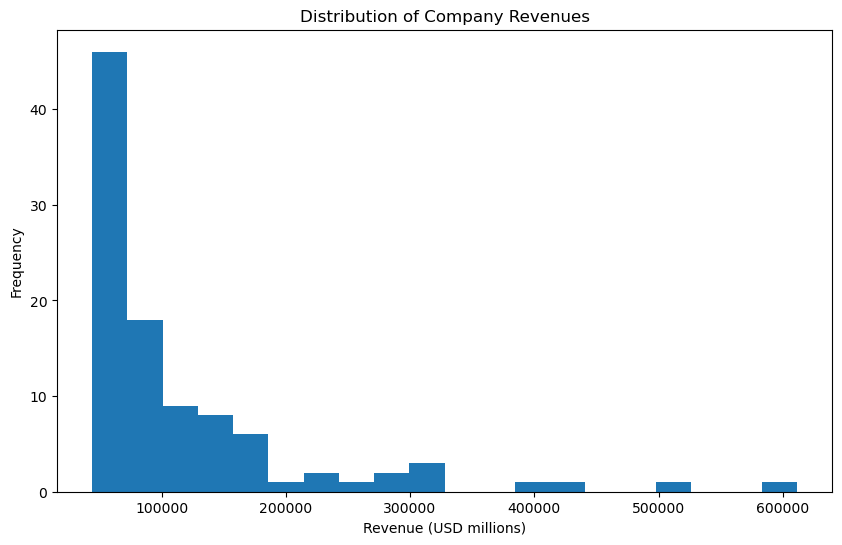

In [27]:
# Plot a histogram of company revenues
plt.figure(figsize=(10, 6))
plt.hist(df['Revenue (USD millions)'], bins=20)
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Company Revenues')
plt.show()